# N.B.
- [ ] Create a class to save data into a file
- [ ] Check pauses into the codes and remove redundant ones (or add them if necessary).
- [ ] With sGen.pul_trig_mode(**'AUTO'**) there aren't errors, instead with sGen.pul_trig_mode(**'SING'**) (theorically more correct) the code stops working.  
    *-1074118634: The trigger has not occurred for the requested buffer, so data cannot be fetched relative to the trigger.*



In [30]:
# Uscita trigger dal signal generator: Pulse Sync

%matplotlib widget
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

import h5py
import time
import numpy as np

import sys
sys.path.insert(1, '..\\Instruments\\network\\Signal_Generator')
sys.path.insert(2, '..\\Instruments\\Acquisition_Card')

import RS_SMA100B
from Card_Class import *


ip              = '192.168.40.15'            # Set IP address of the device
Card_Name       = 'PXI1Slot3'
sGen            = RS_SMA100B.SMA100B(ip)
pxie            = PXIe5170R(Card_Name)

Connection successful!


# Setup parameters

In [31]:
# parameters for the Signal Generator
f_min           = 10e6                                  # tryout value
f_max           = 50e6                                  # tryout value
pulse_freq      = np.arange(f_min, f_max, 1e6)          # Set range of frequency of the signal to send to the resonator
amplitude       = -25                                   # Set the amplitude of the signal in dBm
pulse_width     = 2                                     # 2 microsec
pulse_delay     = 0
pulse_period    = 400  

sGen.reset()
sGen.clear()
sGen.RF_lvl_ampl(amplitude)
sGen.pul_gen_params(delay = pulse_delay, width = pulse_width, period = pulse_period)   # da capire quale pulse width
sGen.pul_gen_mode('SING')
sGen.pul_trig_mode('AUTO')


# parameters for the Acquisition Card
pxie.voltage_range = 2.0
pxie.coupling = 'AC' # or DC????
pxie.num_pts = 1000
pxie.num_records = 1
pxie.ref_position = 0

pxie.open()


# Turn ON the modulation of the Signal Generator
sGen.pul_state(1)
sGen.RF_state(1)

# Acquisition of signals for each frequency in the range

In [32]:

slip = 0.0      # time of sleep of triggering

fetched_data = []

for i in pulse_freq:
    #pxie.sample_rate = 2 * i # f_sample > 2*f_max (Nyquist for every freq) 
    
    sGen.RF_freq(i) # guarda come è definito, abbiamo messo la potenza e6   
    sGen.pul_state(1)
    sGen.RF_state(1)
    time.sleep(0.01)
    wfm = pxie.acquisition(sGen.pul_exe_sing_trig,slip)
    sGen.pul_state(0)
    sGen.RF_state(0)
    fetched_data += [{'freq': i, 'data': wfm[0].samples.tolist()}]


AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
AcquisitionStatus.COMPLETE
A

# Plot of a sweep with the peaks of amplitudes marked

In [44]:
def data_plot(y: np.array):
    x = np.arange(len(y))/pxie.sample_rate
    indices = find_peaks(y)
    # plt.clf()
    plt.grid()
    plt.plot(x, y)
    idx = indices[0]
    plt.scatter(x[idx],y[idx], color = 'orange')
    plt.show()

In [ ]:
f_chosen = fetched_data[0]
print('freq:', f_chosen['freq'])
y = np.array(f_chosen['data'])

data_plot(y)

# Save data on HDF5 file

In [35]:
# with h5py.File('nonloso.hdf5', 'a') as f:                      # creo file hdf5 di nome tra virgolette e lo apro in modalità a = appen
#     for j in range(0, len(fetched_data)):
#         gp_data = f.create_group(str(j))
#         freq, data = fetched_data[j].items()
#         gp_data.create_dataset(str(freq[0]), data = freq[1])
#         gp_data.create_dataset(str(data[0]), data = data[1])

# Read data from HDF5 file

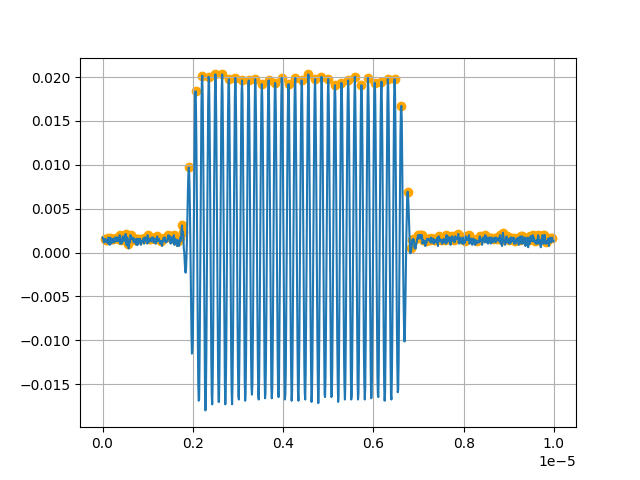

In [43]:
with h5py.File('nonloso.hdf5', 'r') as f:
    for j in f:
    # idx = 7
    gp = f[str(idx)]
    dic = {}
    for i, k in gp.items():
        dic[i] = k[()]
freq = dic['freq']
data = dic['data']

data_plot(data)


# First Data Analysis tryout

In [ ]:
offset = 2.5e-6
end = 5e-6

with h5py.File('nonloso.hdf5', 'r'):
    

In [ ]:
with h5py.File('nonloso.hdf5', 'r') as f:
    for j in range(len(f)):
        print(j)
    # idx = 7
        gp = f[str(j)]
        dic = {}
        for i, k in gp.items():
            dic[i] = k[()]
        freq = dic['freq']
        data = dic['data']

        data_plot(data)

In [51]:
kmnhbhiuohoiuj

NameError: name 'kmnhbhiuohoiuj' is not defined